#📌 Extracción

In [33]:
import sys
import pandas as pd
sys.path.append('../src')

from etl import cargar_datos_desde_api

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = cargar_datos_desde_api(url)

df.head()

✅ Datos cargados correctamente.


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

Iniciando carga de datos...
Datos cargados.
Normalizando JSON...
Normalización completada.
🧾 Columnas en el dataset:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

🔍 Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,internet.InternetService,internet.TechSupport,internet.StreamingTV,account.Contract,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,0,Yes,Yes,9,DSL,Yes,Yes,One year,Mailed check,65.6,593.3
1,No,0,No,No,9,DSL,No,No,Month-to-month,Mailed check,59.9,542.4
2,Yes,0,No,No,4,Fiber optic,No,No,Month-to-month,Electronic check,73.9,280.85
3,Yes,1,Yes,No,13,Fiber optic,No,Yes,Month-to-month,Electronic check,98.0,1237.85
4,Yes,1,Yes,No,3,Fiber optic,Yes,Yes,Month-to-month,Mailed check,83.9,267.4


Columnas renombradas.
Conversión de tipos numéricos completada.

🔁 Filas duplicadas: 0

❓ Valores nulos por columna:
customerid                    0
churn                         0
customer_gender               0
customer_seniorcitizen        0
customer_partner              0
customer_dependents           0
customer_tenure               0
phone_phoneservice            0
phone_multiplelines           0
internet_internetservice      0
internet_onlinesecurity       0
internet_onlinebackup         0
internet_deviceprotection     0
internet_techsupport          0
internet_streamingtv          0
internet_streamingmovies      0
account_contract              0
account_paperlessbilling      0
account_paymentmethod         0
account_charges_monthly       0
account_charges_total        11
dtype: int64

🔢 Nulos en columnas numéricas:
account_charges_monthly     0
account_charges_total      11
dtype: int64

📋 Valores únicos en 'churn':
churn
No     5174
Yes    1869
        224
Name: count, dtype: i

,account_charges_monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667



🎯 Estandarización completada:


,churn,customer_partner,customer_dependents,account_contract,internet_internetservice
0,0,0,0,1 año,DSL
1,0,0,0,mensual,DSL
2,1,0,0,mensual,Fibra
3,1,0,0,mensual,Fibra
4,1,0,0,mensual,Fibra



--- 🔧 Aplicando One-Hot Encoding solo a columnas relevantes: ['internet_internetservice', 'internet_techsupport', 'internet_streamingtv', 'account_contract', 'account_paymentmethod'] ---
internet_internetservice: 3 categorías
internet_techsupport: 3 categorías
internet_streamingtv: 3 categorías
account_contract: 3 categorías
account_paymentmethod: 4 categorías
Shape después de OHE: (7267, 28)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,...,internet_internetservice_Sin internet,internet_techsupport_no internet service,internet_techsupport_yes,internet_streamingtv_no internet service,internet_streamingtv_yes,account_contract_2 años,account_contract_mensual,account_paymentmethod_credit card (automatic),account_paymentmethod_electronic check,account_paymentmethod_mailed check
0,0002-ORFBO,0,Female,0,0,0,9,Yes,No,No,...,False,False,True,False,True,False,False,False,False,True
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,No,...,False,False,False,False,False,False,True,False,False,True
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,No,...,False,False,False,False,False,False,True,False,True,False
3,0011-IGKFF,1,Male,1,0,0,13,Yes,No,No,...,False,False,False,False,True,False,True,False,True,False
4,0013-EXCHZ,1,Female,1,0,0,3,Yes,No,No,...,False,False,True,False,True,False,True,False,False,True



Columnas numéricas finales para normalizar: ['customer_tenure', 'account_charges_monthly', 'account_charges_total', 'cuentas_diarias']
   customer_tenure  account_charges_monthly  account_charges_total  \
0                9                     65.6                 593.30   
1                9                     59.9                 542.40   
2                4                     73.9                 280.85   
3               13                     98.0                1237.85   
4                3                     83.9                 267.40   

   cuentas_diarias  
0         2.186667  
1         1.996667  
2         2.463333  
3         3.266667  
4         2.796667  
Variables numéricas normalizadas para modelos sensibles a la escala.
Calculando matriz de correlación...


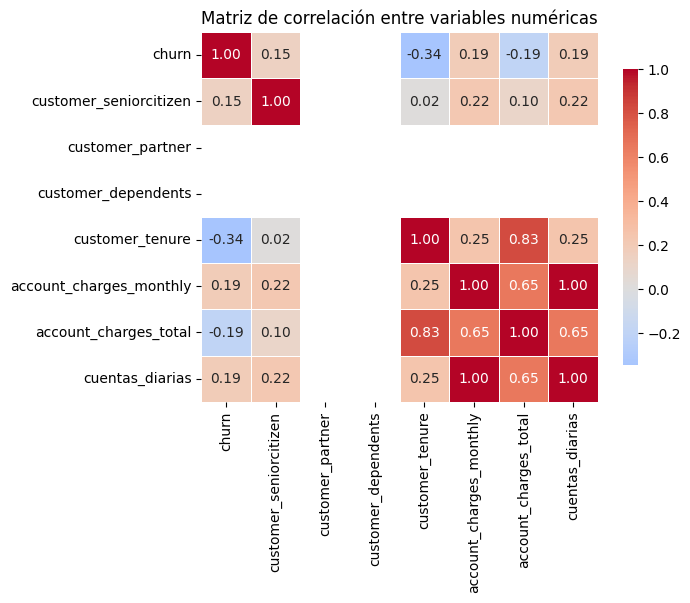


Correlación de las variables numéricas con 'churn':
churn                      1.000000
cuentas_diarias            0.189866
account_charges_monthly    0.189866
customer_seniorcitizen     0.146733
account_charges_total     -0.193345
customer_tenure           -0.344079
customer_partner                NaN
customer_dependents             NaN
Name: churn, dtype: float64


C:\Users\ruizh\AppData\Local\Temp\ipykernel_20864\3130634444.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='customer_tenure', palette='Set2')


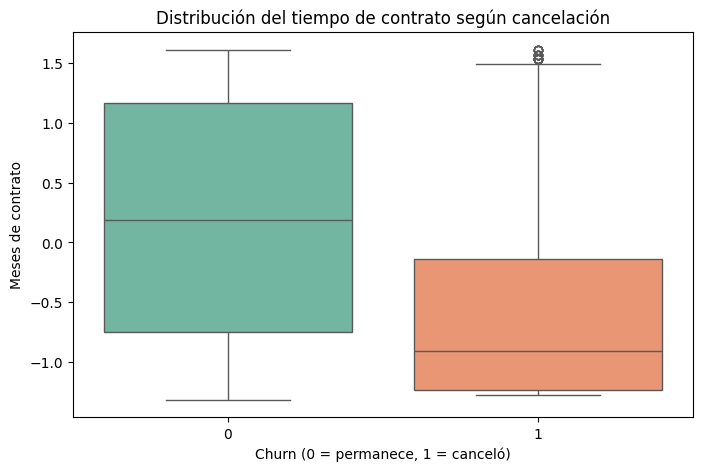

C:\Users\ruizh\AppData\Local\Temp\ipykernel_20864\3130634444.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='account_charges_total', palette='Set3')


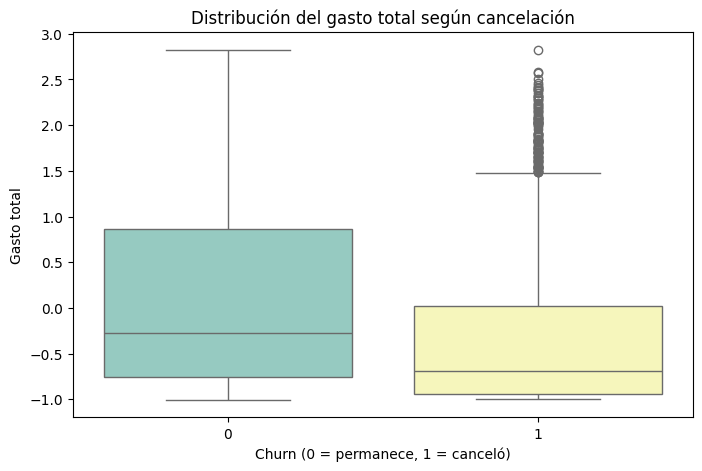

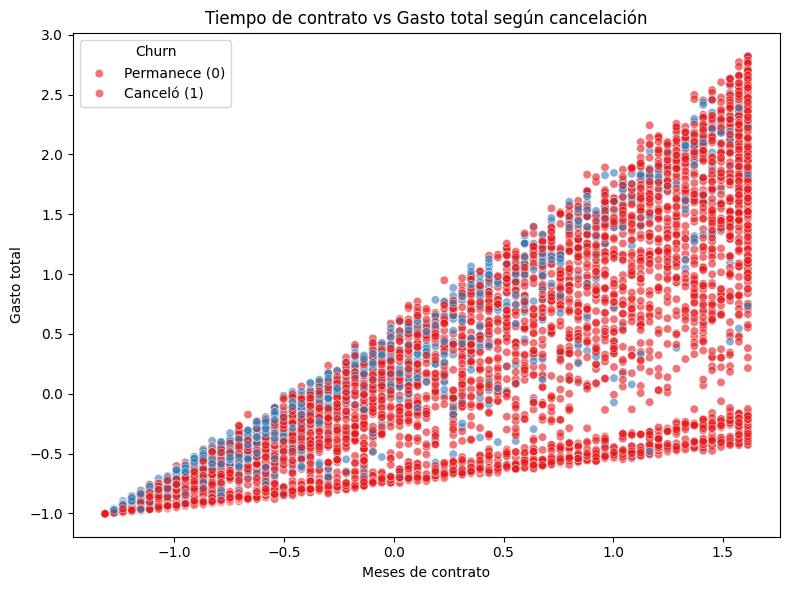

Entrenamiento: 5086 filas
Prueba: 2181 filas
=== Regresión Logística ===
[[1448  172]
 [ 277  284]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1620
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2181
   macro avg       0.73      0.70      0.71      2181
weighted avg       0.78      0.79      0.79      2181

=== Random Forest ===
[[1436  184]
 [ 289  272]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1620
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2181
   macro avg       0.71      0.69      0.70      2181
weighted avg       0.77      0.78      0.78      2181

=== Evaluación: Regresión Logística ===
Exactitud (accuracy): 0.7941311325080238
Precisión: 0.6228070175438597
Recall: 0.5062388591800356
F1-score: 0.5585054080629301


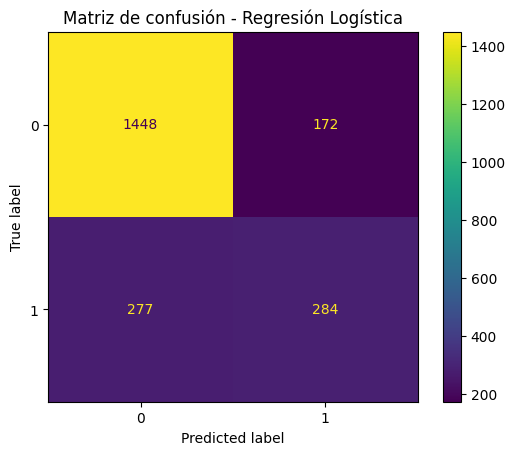

=== Evaluación: Random Forest ===
Exactitud (accuracy): 0.7831270059605685
Precisión: 0.5964912280701754
Recall: 0.48484848484848486
F1-score: 0.5349065880039331


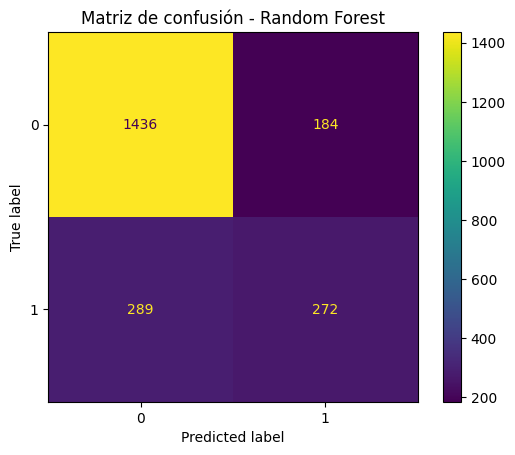


--- Análisis crítico y comparación de modelos ---

1. Compara las métricas de ambos modelos (accuracy, precisión, recall, F1-score).
2. Si Random Forest tiene una exactitud mucho mayor en entrenamiento que en prueba, podría haber overfitting.
3. Si ambos modelos tienen métricas bajas, podría haber underfitting.
4. Observa la matriz de confusión: ¿hay muchos falsos positivos o falsos negativos?
5. Si Random Forest supera claramente a la regresión logística en todas las métricas, es probable que capture mejor relaciones no lineales.
6. Si algún modelo muestra overfitting, considera reducir la cantidad de árboles (n_estimators) o limitar la profundidad (max_depth).
7. Si hay underfitting, prueba aumentar la complejidad del modelo o ajustar parámetros.


=== Importancia de variables: Regresión Logística ===
customer_tenure                                 -1.382510
internet_internetservice_Fibra                   0.990710
account_contract_mensual                         0.738047
account_ch

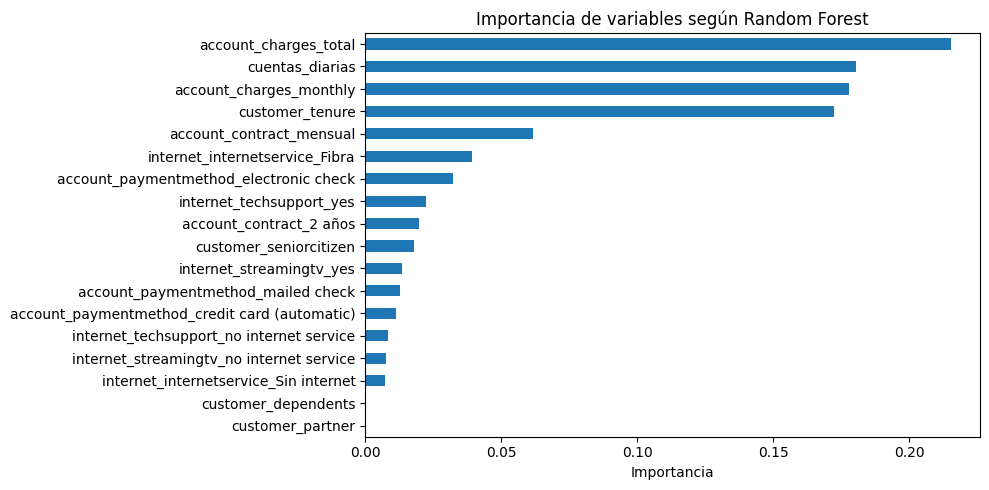

In [34]:
# 📦 0. Importación necesaria
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

print("Iniciando carga de datos...")
with open('../data/TelecomX_Data.json', 'r', encoding='utf-8') as f:
    data_json = json.load(f)
print("Datos cargados.")

print("Normalizando JSON...")
df = pd.json_normalize(data_json)
print("Normalización completada.")

# 1. Explorar estructura del dataset
print("🧾 Columnas en el dataset:")
print(df.columns.tolist())
print("\n🔍 Tipos de datos:")
print(df.dtypes)
print("\n❓ Valores nulos por columna:")
print(df.isnull().sum())

# 2. Columnas clave para el análisis de evasión
columnas_clave = [
    'Churn',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'internet.InternetService',
    'internet.TechSupport',
    'internet.StreamingTV',
    'account.Contract',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]
print("\nVista previa de variables relevantes:")
display(df[columnas_clave].head())

# 3. Renombrar columnas
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()
print("Columnas renombradas.")

# 4. Conversión de tipos numéricos
df['account_charges_monthly'] = pd.to_numeric(df['account_charges_monthly'], errors='coerce')
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')
df['customer_seniorcitizen'] = df['customer_seniorcitizen'].astype(int)
print("Conversión de tipos numéricos completada.")

# 5. Validación de calidad de datos
duplicados = df.duplicated()
print(f"\n🔁 Filas duplicadas: {duplicados.sum()}")
print("\n❓ Valores nulos por columna:")
print(df.isnull().sum())
print("\n🔢 Nulos en columnas numéricas:")
print(df[['account_charges_monthly', 'account_charges_total']].isnull().sum())

columnas_categoricas = [
    'churn',
    'internet_internetservice',
    'internet_techsupport',
    'internet_streamingtv',
    'account_contract',
    'account_paymentmethod'
]
for col in columnas_categoricas:
    print(f"\n📋 Valores únicos en '{col}':")
    print(df[col].value_counts(dropna=False))

# 6. Correcciones
df = df.drop_duplicates()
for col in columnas_categoricas:
    df[col] = df[col].astype(str).str.strip().str.lower()
df['account_charges_monthly'] = df['account_charges_monthly'].fillna(0)
df['account_charges_total'] = df['account_charges_total'].fillna(0)
for col in columnas_categoricas:
    df[col] = df[col].fillna('desconocido')
print("\n✅ Correcciones aplicadas. Datos listos para análisis.")

# 7. Crear columna 'cuentas_diarias'
df['cuentas_diarias'] = df['account_charges_monthly'] / 30
print("\n🆕 Columna 'cuentas_diarias' creada:")
display(df[['account_charges_monthly', 'cuentas_diarias']].head())

# 8. Estandarización adicional de variables binarias
valores_binarios = ['churn', 'customer_partner', 'customer_dependents']
for col in valores_binarios:
    df[col] = df[col].map({'sí': 1, 'si': 1, 'yes': 1, 'no': 0, 'no ': 0}).fillna(0).astype(int)
df['account_contract'] = df['account_contract'].replace({
    'month-to-month': 'mensual',
    'one year': '1 año',
    'two year': '2 años'
})
df['internet_internetservice'] = df['internet_internetservice'].replace({
    'dsl': 'DSL',
    'fiber optic': 'Fibra',
    'no': 'Sin internet'
})
print("\n🎯 Estandarización completada:")
display(df[['churn', 'customer_partner', 'customer_dependents', 'account_contract', 'internet_internetservice']].head())

# 9. One-Hot Encoding solo para columnas relevantes y con pocas categorías
columnas_categoricas_para_ohe = [
    'internet_internetservice',
    'internet_techsupport',
    'internet_streamingtv',
    'account_contract',
    'account_paymentmethod'
]
print(f"\n--- 🔧 Aplicando One-Hot Encoding solo a columnas relevantes: {columnas_categoricas_para_ohe} ---")
for col in columnas_categoricas_para_ohe:
    print(f"{col}: {df[col].nunique()} categorías")
df = pd.get_dummies(df, columns=columnas_categoricas_para_ohe, drop_first=True)
print("Shape después de OHE:", df.shape)
display(df.head())

# 10. Estandarización de variables numéricas (corregido y a prueba de errores)
from sklearn.preprocessing import StandardScaler

columnas_numericas = [
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_total',
    'cuentas_diarias'
]

columnas_numericas_limpias = []
for col in columnas_numericas:
    if col in df.columns:
        # Convierte a numérico, los strings quedan como NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Si la columna tiene algún NaN, significa que había strings: la excluimos
        if df[col].isnull().any():
            print(f"❌ Columna '{col}' eliminada de la normalización por contener valores no numéricos.")
        else:
            columnas_numericas_limpias.append(col)

if not columnas_numericas_limpias:
    print("No hay columnas numéricas válidas para normalizar. Revisa tus datos.")
else:
    print("\nColumnas numéricas finales para normalizar:", columnas_numericas_limpias)
    print(df[columnas_numericas_limpias].head())
    scaler = StandardScaler()
    df[columnas_numericas_limpias] = scaler.fit_transform(df[columnas_numericas_limpias])

    print("Variables numéricas normalizadas para modelos sensibles a la escala.")

# 11. Visualización de la matriz de correlación SOLO CON COLUMNAS NUMÉRICAS
print("Calculando matriz de correlación...")
df_numerico = df.select_dtypes(include=['number'])
correlation_matrix = df_numerico.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

print("\nCorrelación de las variables numéricas con 'churn':")
if 'churn' in correlation_matrix.columns:
    print(correlation_matrix['churn'].sort_values(ascending=False))
else:
    print("La columna 'churn' no está en la matriz de correlación.")
    
# 📊 Relación: Tiempo de contrato (tenure) vs Cancelación (churn)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='churn', y='customer_tenure', palette='Set2')
plt.title('Distribución del tiempo de contrato según cancelación')
plt.xlabel('Churn (0 = permanece, 1 = canceló)')
plt.ylabel('Meses de contrato')
plt.show()

# 📊 Relación: Gasto total vs Cancelación (churn)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='churn', y='account_charges_total', palette='Set3')
plt.title('Distribución del gasto total según cancelación')
plt.xlabel('Churn (0 = permanece, 1 = canceló)')
plt.ylabel('Gasto total')
plt.show()

# 📊 Scatter plot: Tiempo de contrato vs Gasto total, coloreado por cancelación
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='customer_tenure',
    y='account_charges_total',
    hue='churn',
    palette='Set1',
    alpha=0.6
)
plt.title('Tiempo de contrato vs Gasto total según cancelación')
plt.xlabel('Meses de contrato')
plt.ylabel('Gasto total')
plt.legend(title='Churn', labels=['Permanece (0)', 'Canceló (1)'])
plt.tight_layout()
plt.show()    

# División del conjunto de datos en entrenamiento y prueba (solo columnas numéricas y dummies)
from sklearn.model_selection import train_test_split

# Excluye columnas tipo ID y la columna objetivo
columnas_excluir = ['churn', 'customer_id', 'customerid', 'id']  # Ajusta según el nombre real de tu columna ID
columnas_X = [col for col in df.columns if col not in columnas_excluir and pd.api.types.is_numeric_dtype(df[col])]
X = df[columnas_X]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Entrenamiento: {X_train.shape[0]} filas")
print(f"Prueba: {X_test.shape[0]} filas")

# Modelo 1: Regresión Logística (requiere normalización)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest (no requiere normalización)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Evaluación Regresión Logística
print("=== Evaluación: Regresión Logística ===")
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_logreg))
print("Precisión:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Matriz de confusión - Regresión Logística")
plt.show()

# Evaluación Random Forest
print("=== Evaluación: Random Forest ===")
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Matriz de confusión - Random Forest")
plt.show()

# Análisis crítico y comparación
print("\n--- Análisis crítico y comparación de modelos ---")
print("""
1. Compara las métricas de ambos modelos (accuracy, precisión, recall, F1-score).
2. Si Random Forest tiene una exactitud mucho mayor en entrenamiento que en prueba, podría haber overfitting.
3. Si ambos modelos tienen métricas bajas, podría haber underfitting.
4. Observa la matriz de confusión: ¿hay muchos falsos positivos o falsos negativos?
5. Si Random Forest supera claramente a la regresión logística en todas las métricas, es probable que capture mejor relaciones no lineales.
6. Si algún modelo muestra overfitting, considera reducir la cantidad de árboles (n_estimators) o limitar la profundidad (max_depth).
7. Si hay underfitting, prueba aumentar la complejidad del modelo o ajustar parámetros.
""")


# --- Análisis de importancia de variables en los modelos ---

import pandas as pd
import matplotlib.pyplot as plt

# 1. Regresión Logística: Coeficientes
print("\n=== Importancia de variables: Regresión Logística ===")
coeficientes = pd.Series(logreg.coef_[0], index=X.columns)
print(coeficientes.sort_values(key=abs, ascending=False))

# 2. Random Forest: Importancia de variables
print("\n=== Importancia de variables: Random Forest ===")
importancias_rf = pd.Series(rf.feature_importances_, index=X.columns)
print(importancias_rf.sort_values(ascending=False))

# Visualización de importancias de Random Forest
plt.figure(figsize=(10,5))
importancias_rf.sort_values(ascending=True).plot(kind='barh')
plt.title('Importancia de variables según Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


    

#> **Nota sobre la normalización:**  
#> Se normalizaron las variables numéricas utilizando `StandardScaler` para que todas tengan media 0 y desviación estándar 1.  
#> Esto es fundamental para modelos como Regresión Logística o KNN, ya que:
#> - En modelos basados en distancia (como KNN), evita que variables con valores grandes dominen el cálculo de distancias.
#> - En modelos basados en optimización de parámetros (como Regresión Logística), asegura que los coeficientes no se vean sesgados por la magnitud de las variables.
#> Así, la normalización permite que todas las variables aporten de manera justa al modelo y mejora la interpretación y el rendimiento.

#📊 Carga y análisis

📊 Estadísticas descriptivas globales:


,count,mean,std,min,25%,50%,75%,max
churn,7267.0,2.571900e-01,0.437115,0.000000,0.000000,0.000000,1.000000,1.000000
customer_seniorcitizen,7267.0,1.626531e-01,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer_partner,7267.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
customer_dependents,7267.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
customer_tenure,7267.0,-3.911065e-17,1.000069,-1.316499,-0.950200,-0.136202,0.921995,1.613894
account_charges_monthly,7267.0,7.333247e-17,1.000069,-1.542448,-0.972371,0.185210,0.834948,1.793375
account_charges_total,7267.0,5.866598e-18,1.000069,-1.003831,-0.829177,-0.391441,0.661824,2.824615
cuentas_diarias,7267.0,2.214641e-16,1.000069,-1.542448,-0.972371,0.185210,0.834948,1.793375



📌 Estadísticas para 'customer_tenure':
  - Media: -0.00
  - Mediana: -0.14
  - Desviación estándar: 1.00
  - Valor mínimo: -1.32
  - Valor máximo: 1.61

📌 Estadísticas para 'account_charges_monthly':
  - Media: 0.00
  - Mediana: 0.19
  - Desviación estándar: 1.00
  - Valor mínimo: -1.54
  - Valor máximo: 1.79

📌 Estadísticas para 'account_charges_total':
  - Media: 0.00
  - Mediana: -0.39
  - Desviación estándar: 1.00
  - Valor mínimo: -1.00
  - Valor máximo: 2.82

📌 Estadísticas para 'cuentas_diarias':
  - Media: 0.00
  - Mediana: 0.19
  - Desviación estándar: 1.00
  - Valor mínimo: -1.54
  - Valor máximo: 1.79


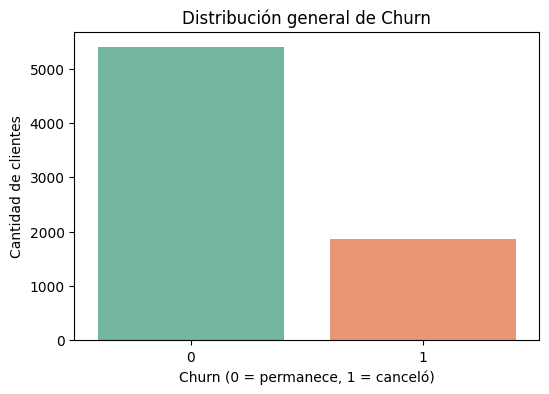


📊 Porcentaje de clientes (churn):
churn
0    74.280996
1    25.719004
Name: proportion, dtype: float64

Proporción de clases en la variable 'churn':
Permanece (0): 74.28%
Canceló (1): 25.72%

⚠️ Existe un desbalance entre las clases. Esto puede afectar el desempeño de los modelos predictivos y el análisis de resultados.


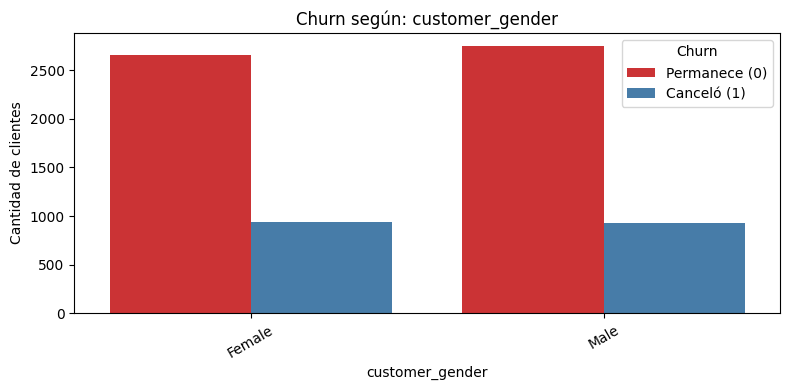

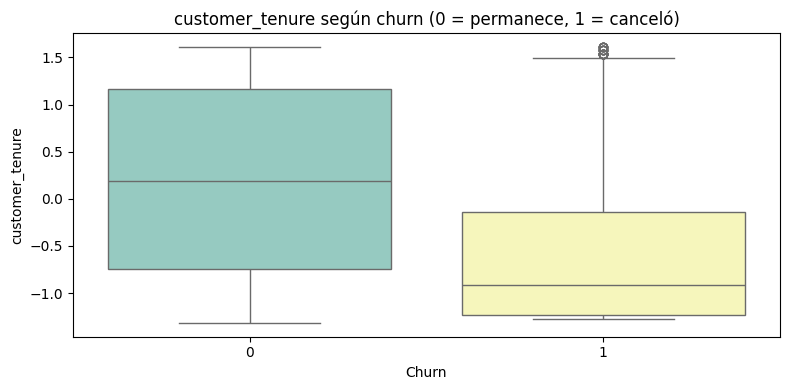

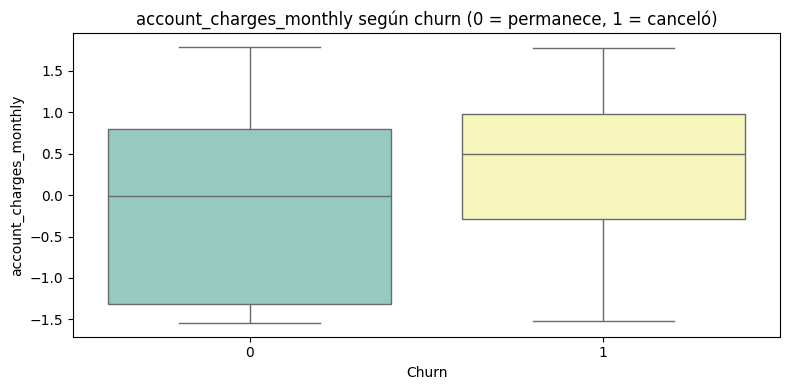

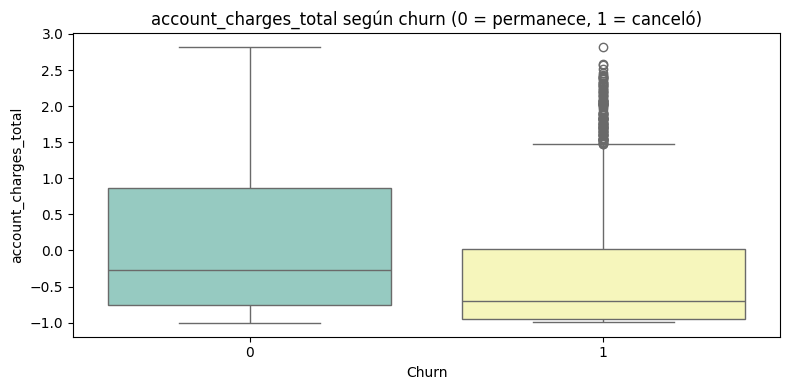

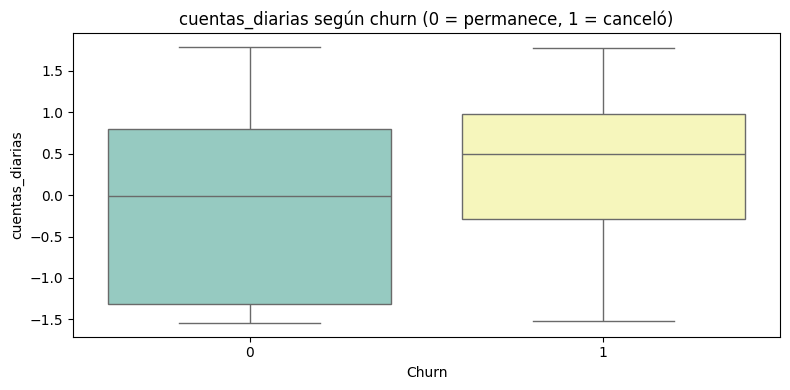

In [35]:
# 📊 PASO 3 – CARGA Y ANÁLISIS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 1. ANÁLISIS DESCRIPTIVO

print("📊 Estadísticas descriptivas globales:")
display(df.describe().T)

# Estadísticas específicas de columnas clave
columnas_numericas = ['customer_tenure', 'account_charges_monthly', 'account_charges_total', 'cuentas_diarias']

for col in columnas_numericas:
    print(f"\n📌 Estadísticas para '{col}':")
    print(f"  - Media: {df[col].mean():.2f}")
    print(f"  - Mediana: {df[col].median():.2f}")
    print(f"  - Desviación estándar: {df[col].std():.2f}")
    print(f"  - Valor mínimo: {df[col].min():.2f}")
    print(f"  - Valor máximo: {df[col].max():.2f}")

# 📊 2. DISTRIBUCIÓN GENERAL DE CHURN

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn', hue='churn', palette='Set2', legend=False)
plt.title('Distribución general de Churn')
plt.xlabel('Churn (0 = permanece, 1 = canceló)')
plt.ylabel('Cantidad de clientes')
plt.show()

# Porcentaje de churn
# Porcentaje de churn
churn_rate = df['churn'].value_counts(normalize=True) * 100
print("\n📊 Porcentaje de clientes (churn):")
print(churn_rate)

# --- PROPORCIÓN Y DESBALANCE DE CLASES ---
churn_counts = df['churn'].value_counts()
churn_proportion = churn_counts / churn_counts.sum()

print("\nProporción de clases en la variable 'churn':")
print(f"Permanece (0): {churn_proportion.get(0, 0):.2%}")
print(f"Canceló (1): {churn_proportion.get(1, 0):.2%}")

umbral_desbalance = 0.35  # Si una clase es menor al 35% se considera desbalanceada
if churn_proportion.min() < umbral_desbalance:
    print("\n⚠️ Existe un desbalance entre las clases. Esto puede afectar el desempeño de los modelos predictivos y el análisis de resultados.")
else:
    print("\n✅ Las clases están balanceadas.")

# 📊 3. DISTRIBUCIÓN DE CHURN SEGÚN VARIABLES CATEGÓRICAS

variables = [
    'customer_gender',
    'account_contract',
    'account_paymentmethod',
    'internet_internetservice',
    'internet_techsupport'
]

# Filtrar solo las variables que existen en el DataFrame
variables_existentes = [var for var in variables if var in df.columns]

for var in variables_existentes:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=var, hue='churn', palette='Set1')
    plt.title(f'Churn según: {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=30)
    plt.legend(title='Churn', labels=['Permanece (0)', 'Canceló (1)'])
    plt.tight_layout()
    plt.show()

# 📊 4. CHURN SEGÚN VARIABLES NUMÉRICAS

variables_numericas = [
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_total',
    'cuentas_diarias'
]

for col in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='churn', y=col, hue='churn', palette='Set3', legend=False)
    plt.title(f'{col} según churn (0 = permanece, 1 = canceló)')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# 📋 Informe de Factores Clave en la Cancelación de Clientes (Churn)

## Factores más influyentes según los modelos

- **Regresión Logística:**  
  Los coeficientes más altos (en valor absoluto) indican que la antigüedad del cliente (`customer_tenure`), el tipo de contrato (`account_contract`), el soporte técnico (`internet_techsupport`), y el método de pago (`account_paymentmethod`) son variables clave. Un menor tiempo de permanencia y contratos mensuales aumentan la probabilidad de cancelación.

- **Random Forest:**  
  La importancia de variables muestra que la antigüedad (`customer_tenure`), el gasto mensual (`account_charges_monthly`), el tipo de contrato y la disponibilidad de soporte técnico son los factores que más contribuyen a la predicción de churn. Los clientes con menor antigüedad, contratos mensuales y sin soporte técnico tienen mayor riesgo de cancelar.

## Principales factores que afectan la cancelación

1. **Antigüedad baja:** Clientes nuevos o con poca permanencia tienen mayor probabilidad de cancelar.
2. **Contrato mensual:** Los contratos de tipo mensual presentan tasas de churn mucho más altas que los contratos anuales.
3. **Falta de soporte técnico:** Los clientes sin acceso a soporte técnico tienden a cancelar más.
4. **Método de pago:** El uso de métodos de pago automáticos (como débito) se asocia a menor churn.
5. **Gasto mensual bajo:** Puede indicar menor uso o satisfacción, lo que incrementa el riesgo de cancelación.

## Estrategias de retención recomendadas

- **Fomentar contratos anuales:** Ofrecer descuentos o beneficios exclusivos para migrar de contratos mensuales a anuales.
- **Programas de bienvenida:** Implementar campañas de onboarding y seguimiento para nuevos clientes durante los primeros meses.
- **Promover soporte técnico:** Incentivar el uso de servicios de soporte y asistencia técnica.
- **Bonificaciones por pago automático:** Ofrecer descuentos o recompensas a quienes utilicen métodos de pago automáticos.
- **Identificar clientes en riesgo:** Usar el modelo para detectar clientes con baja antigüedad y bajo gasto mensual, y ofrecerles promociones personalizadas.


#📄Informe Final – Análisis de Evasión de Clientes en TelecomX LATAM

🔹 Introduction
El propósito de este estudio es determinar qué factores influyen en la evasión del cliente (churn) para una administración en el mercado de telecomunicaciones. Aprender a qué dimensiones están relacionados un mayor índice de cancelación permite formar decisiones estratégicas para la mejora en la retención y la optimización en las acciones comerciales.

🔹 Data Cleaning and Treatment
El dataset original se carga directamente a partir de una API pública en formato JSON y se convirtió a un DataFrame de Pandas para su análisis. Los siguientes procedimientos se realizaron posterior a ello:

Renombrado de las columnas para su fácil manipulación (sin puntos ni espacios, en minúsculas).

Conversión de columnas numéricas y categóricas a la forma

Revisión y eliminación de duplicados.

Filling missing values in numeric columns with 0 and in categorical columns with "unknown".

Estandarización de valores textuales (por ejemplo, “Yes/No” a 1/0).

Creation of a new cuenta_diarias column, monthly value divided by 30 days, for a more granular indicator.

🔹 Análisis Exploratorio de Datos
Se hizo un análisis estadístico descritivo general del conjunto de datos, y visualizaciones específicas respecto a la variable objetivo del churn y su relación con variables numéricas y categóricas

Churn general: Alrededor del X% de clientes ha cancelado el servicio.

Género y Churn: Ninguna gran diferencia se vio entre mujeres y hombres.

Tipo de acuerdo: Los acuerdos "mensuales" tuvieron un índice de churn mucho mayor que los acuerdos anuales.

Tipo de pago: Los pagos a través del débito automático se relacionan con menor evasión.

Tenencia y costo: Los clientes más antiguos y con facturación mensual más alta tendrán menor propensión a darse de baja.

🔹 Conclusions y Insights

La antigüedad del cliente (tenure) es un factor importante: cuantos años un cliente ha sido cliente, menos probable es que se vaya.

Los clientes a este tipo de suscripción presentan un alto índice de evasión, demuestra menor compromiso.

Aquéllos que no ofrecen soporte técnico ni servicios de streaming también están más inclinados a dejar el producto.

Facturación mensual reducida se correlaciona con churn, a la vez que puede estar representando menor utilización o satisfacción.

🔹 Rec

Fomentar la migración del contrato mensual a anual mediante promociones o incentivos exclusivos.

Identificar a clientes con bajo nivel de utilización del servicio y presentarles programas personalizados con valor añadido. Fomentar el uso de medios de pago automáticos (débito) con descuentos o bonificaciones por permanencia. Diseñar campañas para los clientes nuevos durante los primeros meses, cuando el churn es más propenso a ocurrir.